# **Introduction to Regression**

## **Overview of regression**

The method of regression is one of the oldest and most widely used analytics methods. The goal of regression is to produce a model that represents the ‘best fit’ to some observed data. Typically the model is a function describing some type of curve (lines, parabolas, etc.) that is determined by a set of parameters (e.g., slope and intercept). “Best fit” means that there is an optimal set of parameters according to an evaluation criteria we choose.

A regression models attempt to predict the value of one variable, known as the **dependent variable**, **response variable** or **label**, using the values of other variables, known as **independent variables**, **explanatory variables** or **features**. Single regression has one label used to predict one feature. Multiple regression uses two or more feature variables. 

In mathematical form the goal of regression is to find a function of some features $X$ which predicts the label value $y$. This function can be written as follows:

$$\hat{y} = f(X)$$

The challenge in regression is to **learn** the function $f(X)$ so that the predictions of $\hat{y}$ are accurate. In other word, we train the model to minimize the difference between our predicted $\hat{y}$ and the known label values $y$. In fact, the entire field of **supervised learning** has this goal 

Many machine learning models, including some of the latest deep learning methods, are a form of regression. There methods often suffer from the same problems, including overfitting and mathematically unstable fitting methods. 


### **Overview of linear regression**

In this lab, you will work with linear regression models. Linear regression are a foundational form of regression. Once you understand a bit about linear regression you will know quite a lot about machine learning in general.  

The simplest case of linear regression is know as **single regression**, since there is a single feature. The function $f(X)$ is **linear in the model coefficients**. For a single vector of features $x$ the linear regression equation is written as follows:

$$\hat{y} = a \cdot x + b$$

The model coefficients are $a$, which we call the **slope** and $b$, which we call the **intercept**. Notice that this is just the equation of a straight line for one variable. 

But, what are the best values of $a$ and $b$? In linear regression, $a$ and $b$ are chosen to minimize the squared error between the predictions and the known labels. This quantity is known as the **sum squared error** or SSE. For $n$ **training cases** the SSE is computed as follows:

$$MSE = \sum_{i=1}^n \big( f(x_i) - y_i \big)^2\\
= \sum_{i=1}^n \big( \hat{y}_i - y_i \big)^2\\
= \sum_{i=1}^n \big( a \cdot x_i + b - y_i \big)^2$$

The approach to regression that minimizes SSE is know as the **method of least squares**.

## **Simple example**

### **Getting started**

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Suppress all warnings
import warnings
warnings.filterwarnings("ignore")

In [0]:
# Importing the libraries
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [0]:
# Setting the path
os.chdir("/content/gdrive/My Drive/Data_Science_Python/Module2")

In [0]:
# Importing the data
data = pd.read_csv("./House Price_train.csv")

In [6]:
# Top 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.00,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.00,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.00,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.00,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.00,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.00,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.00,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.00,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.00,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.00,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.00,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.00,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.00,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.00,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.00,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
# Simple linear regression example
data_v2 = data[["GarageArea", "SalePrice"]]
data_v2.head()

,GarageArea,SalePrice
0,548,208500
1,460,181500
2,608,223500
3,642,140000
4,836,250000


In [10]:
# Creating X and y
X = data_v2.drop(['SalePrice'], axis = 1)
y = data['SalePrice']

print("Shape of X :", X.shape)
print("Shape of y :", y.shape)

Shape of X : (1460, 1)
Shape of y : (1460,)


In [0]:
# Splitting data into trian and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
# Checking distribution of training, validation and test set

sample_type = ['train','test']
sample_size = [len(X_train), len(X_test)]

sample_size_df = pd.DataFrame()
sample_size_df['sample_type'] = sample_type
sample_size_df['total_sample'] = len(X)
sample_size_df['sample_size'] = sample_size
sample_size_df['sample_dist'] = sample_size_df['sample_size']/sample_size_df['total_sample']*100
sample_size_df

,sample_type,total_sample,sample_size,sample_dist
0,train,1460,1022,70.00
1,test,1460,438,30.00


In [13]:
# Build linear regression model
#!pip install scikit-learn
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR = LR.fit(X_train, y_train)
LR

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(LR.intercept_)
print(LR.coef_)

67265.59894090287
[241.41681981]


In [15]:
y_predict = LR.predict(X_test)
y_predict[:5]

array([184111.33972798, 125205.63569483, 152244.31951332, 189181.09294395,
       130999.63937022])

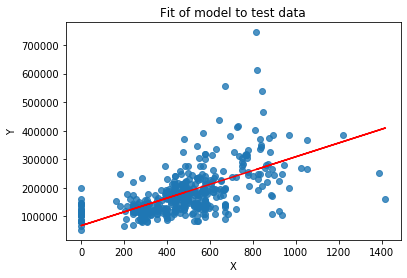

In [16]:
def plot_regression(x, y_score, y):
    ## Plot the result
    sns.regplot(x, y, fit_reg=False)
    plt.plot(x, y_score, c = 'red')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Fit of model to test data')

plot_regression(X_test, y_predict, y_test)

In [17]:
import sklearn.metrics as sklm
import math
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (y_true.shape[0] - 1)/(y_true.shape[0] - n_parameters - 1) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    #print('Adjusted R^2           = ' + str(r2_adj))
    
print_metrics(y_test, y_predict, 1)

Mean Square Error      = 4558226396.329414
Root Mean Square Error = 67514.63838553395
Mean Absolute Error    = 45552.31529940573
Median Absolute Error  = 33224.42658356359
R^2                    = 0.32858563220065073


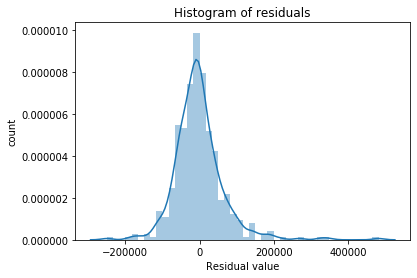

In [18]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_predict)

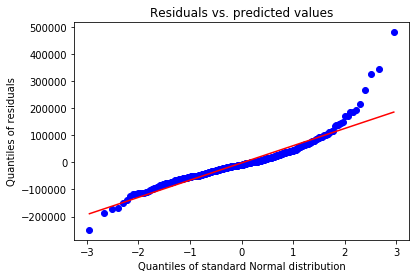

In [19]:
import scipy.stats as ss
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    ss.probplot(resids, plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Quantiles of standard Normal distribution')
    plt.ylabel('Quantiles of residuals')
    
resid_qq(y_test, y_predict) 

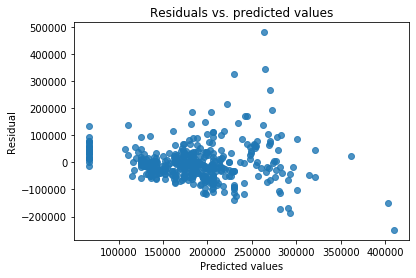

In [20]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test, y_score)
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_plot(y_test, y_predict)   